# UEF spectra handling 

<div class="alert alert-block alert-success">

<li>Soft for conjugated scanning-table and mobile spectrometer control was written by Kudarenko
<li>Transfer optical system (made by Kudarenko) from MSU to UEF, CVD processes, spectra collection were done by Malykhin
<li>Final engineering of the optical system at the UEF - Itkonen
<li>ML, Supervisor, inspirer - Ismagilov

</div>

## Part 1b. Plotting specific OES line and $T_{e}$ distributions

In [1]:
# Author: Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format


In [2]:
# nice practice

%load_ext version_information
# pip install version_information

%version_information numpy, pandas, matplotlib, sklearn, version_information

C:\Anaconda3\envs\rebri_env\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


Software versions
Python 3.5.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.18362 SP0
numpy 1.10.1
pandas 0.20.3
matplotlib 3.0.0
sklearn 0.20.0
version_information 1.0.3
Thu Oct 10 15:57:53 2019 RTZ 2 (ceia)

In [3]:
from _myconfig import *
raw_Kud, raw_Mal, my_fname, rastr
# raw_Kud = "spec_scan_2019_10_01__14-19-20.txt"
# raw_Mal = "MPMA_20191001141917.txt"
# my_fname = "__114_14_19_"
# rastr = (67,113)   # kud_df - last line

('spec_scan_2019_10_10__13-18-06.txt',
 'MPMA_20191010131801.txt',
 '__118_13_18_',
 (55, 99))

## Upload scan data

In [4]:
# recall
scan_df = pd.read_pickle("xy_wl"+my_fname+".pkl")
scan_df = scan_df.sort_values(by=['x','y'])
scan_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9495.41,9502.65,9509.89,9517.13,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,1049.286,675.148,793.172,999.197,832.101,916.913,1019.641,993.874,1197.294,1000.749
1,0.0,0.0,36.375,29.555,-13.641,13.641,40.922,-9.094,2.273,4.547,...,918.834,626.537,824.277,1103.591,846.448,949.166,1055.418,1072.684,1184.647,920.044
2,0.0,0.0,43.195,15.914,0.000,61.383,70.477,-20.461,-25.008,-27.281,...,1020.927,675.148,694.674,1063.822,803.408,972.204,974.920,928.200,1142.489,1016.890
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,1003.911,680.549,839.829,1053.880,784.279,981.419,1162.749,1103.332,1142.489,1028.996
4,0.0,1.0,72.750,4.547,13.641,18.188,65.930,27.281,-43.195,-22.734,...,1106.004,707.555,813.909,1073.764,894.270,962.989,1104.611,1055.171,1323.769,1033.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11718,55.0,99.0,325.103,302.368,256.900,188.696,256.900,190.970,275.087,250.079,...,24950.316,24478.160,24697.203,25407.449,25422.121,25033.104,25772.773,26151.592,27107.760,26774.076
11719,55.0,99.0,325.103,302.368,222.798,263.720,263.720,213.704,245.532,270.540,...,25347.344,24548.375,24852.727,25462.133,25527.330,25774.928,25813.023,26663.855,27267.959,27064.617
11720,55.0,99.0,279.634,311.462,220.524,177.329,247.806,215.977,256.900,275.087,...,25069.424,24499.764,24510.574,25402.479,25484.291,25770.318,26184.209,26663.855,26993.932,27359.191
11721,55.0,99.0,302.368,343.290,202.337,211.431,263.720,204.610,254.626,227.345,...,25523.170,24521.369,25023.805,25407.449,25412.559,25650.523,25960.604,26475.588,27386.002,27399.545


<div class="alert alert-block alert-info"> NOTE! For each {x,y} point corresponds at least 2 spectra (2,3, many). There too many <i>wl</i> at the same {104, 64} scanning stop point. Some preprocessing should be taken.
</div>

In [5]:
#we throw away all duplicates except first appeared
scan_df["x"]=scan_df["x"].astype(str)
scan_df["y"]=scan_df["y"].astype(str)
scan_df["x_y"]=scan_df["x"]+"_"+scan_df["y"]
scan_df = scan_df.drop_duplicates(subset='x_y', keep="first") # = 113*67 - we lost some cathode lines

In [6]:
scan_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9502.65,9509.89,9517.13,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,675.148,793.172,999.197,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,680.549,839.829,1053.880,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,729.160,746.515,1088.678,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,880.393,839.829,1242.783,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,874.992,933.144,1287.523,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,26795.268,27413.688,27967.580,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,26206.539,26330.205,27380.988,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27265.168,27418.873,27738.910,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,25450.373,25749.582,26605.492,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0


In [7]:
wl = np.array(scan_df.columns[2:-1])
wl = wl.astype(float)

intens = np.array(scan_df.iloc[:,2:-1].values,dtype='float64')
coord = np.array(scan_df.iloc[:,:2].values,dtype='float64')
wl.shape, intens.shape, coord.shape 
# wavelengths are in Columns-name, let's add them into DataFrame as last row 
# df_wl = scan_df.append(dict(zip(scan_df.columns, scan_df.columns)),ignore_index=True)
# df_wl


((1024,), (5600, 1024), (5600, 2))

## Plot specific OES line distribution

[ 1922.31  1929.96  1937.62  1945.27  1952.92  1960.58  1968.23  1975.88
  1983.53  1991.19  1998.84  2006.49  2014.14  2021.79  2029.44  2037.09
  2044.74  2052.39  2060.04  2067.69  2075.34  2082.98  2090.63  2098.28
  2105.93  2113.57  2121.22  2128.87  2136.51  2144.16  2151.8   2159.45
  2167.1   2174.74  2182.38  2190.03  2197.67  2205.32  2212.96  2220.6
  2228.24  2235.89  2243.53  2251.17  2258.81  2266.45  2274.09  2281.74
  2289.38  2297.02  2304.66  2312.29  2319.93  2327.57  2335.21  2342.85
  2350.49  2358.12  2365.76  2373.4   2381.04  2388.67  2396.31  2403.94
  2411.58  2419.22  2426.85  2434.48  2442.12  2449.75  2457.39  2465.02
  2472.65  2480.29  2487.92  2495.55  2503.18  2510.81  2518.45  2526.08
  2533.71  2541.34  2548.97  2556.6   2564.23  2571.86  2579.49  2587.11
  2594.74  2602.37  2610.    2617.63  2625.25  2632.88  2640.51  2648.13
  2655.76  2663.38  2671.01  2678.63  2686.26  2693.88  2701.51  2709.13
  2716.75  2724.38  2732.    2739.62  2747.24  2754.

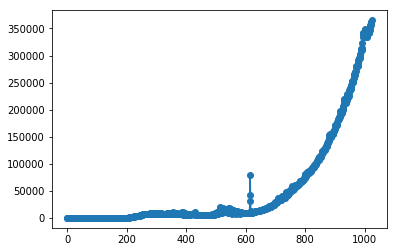

In [8]:
#choose from the list
import sys
np.set_printoptions(threshold=sys.maxsize)
print(wl[:])
np.set_printoptions(threshold=1000)
plt.plot(intens[50], "-o")

In [9]:
CHOSEN_WL = 4612.25
CHOSEN_WL in wl

True

In [10]:
# a = np.empty((68*114,))
# a[:] = np.nan
# a = np.array([1,2,3,4])
# np.pad(a, ((0,68*114-(scan_df[CHOSEN_WL].values).shape[0])), 'constant', constant_values = 1)


In [11]:
z = np.pad(scan_df[CHOSEN_WL].values,((0,(rastr[0]+1)*(rastr[1]+1)-(scan_df[CHOSEN_WL].values).shape[0])), 'constant', constant_values = 1) 
# Z = z.reshape(int(z.shape/(coord[-1,1]+1)),-1)
Z = z.reshape(int(z.shape[0]/(rastr[1]+1)),-1)
# http://jeffskinnerbox.me/notebooks/matplotlib-2d-and-3d-plotting-in-ipython.html

# phi_m = np.linspace(0, coord[-1,0], int(coord[-1,0]+1))
phi_m = np.linspace(0, rastr[0], rastr[0]+1)

# phi_p = np.linspace(0, coord[-1,1], int(coord[-1,1]+1))
phi_p = np.linspace(0, rastr[1], rastr[1]+1)
X,Y = np.meshgrid(phi_p, phi_m)
X,Y,Z.shape

(array([[  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        ..., 
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  2.,   2.,   2., ...,   2.,   2.,   2.],
        ..., 
        [ 53.,  53.,  53., ...,  53.,  53.,  53.],
        [ 54.,  54.,  54., ...,  54.,  54.,  54.],
        [ 55.,  55.,  55., ...,  55.,  55.,  55.]]),
 (56, 100))

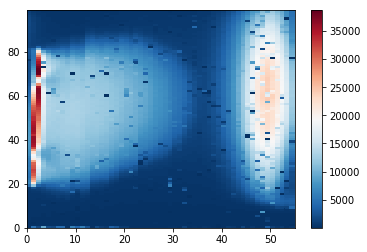

In [12]:

fig, ax = plt.subplots()

p = ax.pcolor(Y,X, Z, cmap=plt.cm.RdBu_r, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p)
# plt.savefig("img/"+str(CHOSEN_WL)+my_fname+".svg", dpi = 300)
# plt.savefig("img/"+str(CHOSEN_WL)+my_fname+".png", dpi = 300)

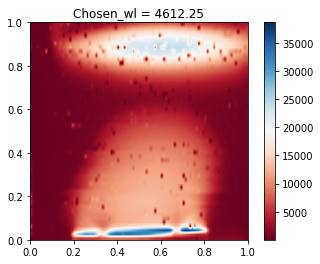

In [14]:
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper", "lower"
im = plt.imshow(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1], origin="lower")
im.set_interpolation('bilinear')

plt.title("Chosen_wl = "+str(CHOSEN_WL))
plt.savefig("img/"+str(CHOSEN_WL)+my_fname+".svg", dpi = 300)
plt.savefig("img/"+str(CHOSEN_WL)+my_fname+".png", dpi = 300)

cb = fig.colorbar(im)

## Plot $H_{\alpha}, H_{\beta}$ line and $T_e$ distributions


<div class="alert alert-block alert-info"> 
#TODO: check! 
Do these lines correspond to local extremum?<br>
Last time $H_{\alpha}$ = 6566.42A, $H_{\beta}$ = 4868.33A
</div>


## $H_{\alpha}$ =6564.54 
(but our spectrometer usually assign  6566.42A)

In [15]:
# 6506.94 in scan_df.columns
# scan_df.columns.map(type)
scan_df.columns = scan_df.columns.astype(str)
nearHa = scan_df.loc[:,"6506.94":"6625.87"]
nearHa

,6506.94,6514.37,6521.81,6529.24,6536.68,6544.11,6551.549999999999,6558.9800000000005,6566.42,6573.85,6581.280000000001,6588.719999999999,6596.15,6603.58,6611.01,6618.4400000000005,6625.87
0,172.401,178.704,137.790,152.288,143.857,195.376,312.914,1513.173,4748.088,2279.199,374.188,202.182,163.143,170.210,184.457,200.312,139.921
3,174.421,183.425,151.299,152.965,146.572,189.930,305.398,1513.859,4732.247,2270.901,369.328,203.577,142.138,170.210,185.870,191.078,130.641
5,181.155,190.843,148.597,168.532,145.214,192.653,310.181,1548.156,4843.821,2307.551,393.626,215.429,157.542,184.277,183.043,194.629,140.635
7,189.237,202.307,151.974,194.928,166.250,212.395,330.677,1668.880,5073.167,2418.883,419.313,239.830,158.242,195.531,180.923,201.732,167.049
9,202.706,205.679,170.211,195.605,164.214,214.437,360.056,1680.541,5295.626,2540.587,443.611,228.675,177.147,197.641,209.899,220.201,162.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,1644.541,1530.115,1587.961,1679.904,1695.752,2069.491,5288.106,40089.477,135044.328,73265.586,10678.587,2826.370,1986.429,1764.701,1518.057,1699.099,1823.256
11678,1523.995,1427.613,1479.890,1546.567,1541.716,1890.453,4673.893,35479.309,119007.984,64260.824,9374.831,2562.139,1811.382,1618.405,1436.076,1597.522,1663.346
11680,1563.728,1493.700,1556.890,1612.220,1639.430,1987.120,5041.464,38238.141,128267.242,69292.898,10107.934,2669.504,1866.697,1699.993,1533.605,1640.141,1770.429
11682,1534.770,1465.377,1490.022,1579.732,1615.002,1939.467,4888.423,37526.137,126404.234,67613.234,9758.044,2564.927,1827.486,1658.496,1513.817,1596.812,1698.327


In [16]:
#all(nearHa.max(axis=1)==nearHa["6566.42"]) #was False
#nearHa[nearHb.max(axis=1)!=nearHa["6566.42"]] #was about 377rows
criter = (nearHa.max(axis=1)==nearHa["6566.42"]) | (nearHa.max(axis=1)==nearHa["6558.9800000000005"])|(nearHa.max(axis=1)==nearHa["6573.85"])
nearHa[criter == True]
# all(criter.values)

,6506.94,6514.37,6521.81,6529.24,6536.68,6544.11,6551.549999999999,6558.9800000000005,6566.42,6573.85,6581.280000000001,6588.719999999999,6596.15,6603.58,6611.01,6618.4400000000005,6625.87
0,172.401,178.704,137.790,152.288,143.857,195.376,312.914,1513.173,4748.088,2279.199,374.188,202.182,163.143,170.210,184.457,200.312,139.921
3,174.421,183.425,151.299,152.965,146.572,189.930,305.398,1513.859,4732.247,2270.901,369.328,203.577,142.138,170.210,185.870,191.078,130.641
5,181.155,190.843,148.597,168.532,145.214,192.653,310.181,1548.156,4843.821,2307.551,393.626,215.429,157.542,184.277,183.043,194.629,140.635
7,189.237,202.307,151.974,194.928,166.250,212.395,330.677,1668.880,5073.167,2418.883,419.313,239.830,158.242,195.531,180.923,201.732,167.049
9,202.706,205.679,170.211,195.605,164.214,214.437,360.056,1680.541,5295.626,2540.587,443.611,228.675,177.147,197.641,209.899,220.201,162.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,1644.541,1530.115,1587.961,1679.904,1695.752,2069.491,5288.106,40089.477,135044.328,73265.586,10678.587,2826.370,1986.429,1764.701,1518.057,1699.099,1823.256
11678,1523.995,1427.613,1479.890,1546.567,1541.716,1890.453,4673.893,35479.309,119007.984,64260.824,9374.831,2562.139,1811.382,1618.405,1436.076,1597.522,1663.346
11680,1563.728,1493.700,1556.890,1612.220,1639.430,1987.120,5041.464,38238.141,128267.242,69292.898,10107.934,2669.504,1866.697,1699.993,1533.605,1640.141,1770.429
11682,1534.770,1465.377,1490.022,1579.732,1615.002,1939.467,4888.423,37526.137,126404.234,67613.234,9758.044,2564.927,1827.486,1658.496,1513.817,1596.812,1698.327


In [17]:
nearHa.max(axis=1)

0          4748.088
3          4732.247
5          4843.821
7          5073.167
9          5295.626
            ...    
11676    135044.328
11678    119007.984
11680    128267.242
11682    126404.234
11685    126649.414
Length: 5600, dtype: float64

In [18]:
scan_df["H_a"]=nearHa.max(axis=1).values
scan_df

C:\Anaconda3\envs\rebri_env\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9509.89,9517.13,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y,H_a
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,793.172,999.197,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,839.829,1053.880,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,746.515,1088.678,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,839.829,1242.783,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,933.144,1287.523,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,27413.688,27967.580,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,26330.205,27380.988,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27418.873,27738.910,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,25749.582,26605.492,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234


## $H_{\beta}$ =4861.36 
(but our spectrometer usually assign  4868.33A)

In [19]:
# "4936.05" in scan_df.columns
# scan_df.columns.map(type)
# scan_df.columns = scan_df.columns.astype(str)
nearHb = scan_df.loc[:,"4808.11":"4936.05"]
nearHb

,4808.11,4815.64,4823.17,4830.7,4838.23,4845.75,4853.28,4860.8,4868.33,4875.860000000001,4883.38,4890.91,4898.43,4905.950000000001,4913.4800000000005,4921.0,4928.5199999999995,4936.05
0,284.421,279.451,269.523,325.030,324.993,279.076,304.581,579.558,646.911,387.263,276.147,260.255,270.933,257.888,227.427,242.062,299.458,350.359
3,303.716,281.590,259.567,327.869,332.782,276.956,288.365,580.262,667.960,390.064,263.563,253.277,293.220,264.839,235.054,228.922,299.458,338.658
5,316.579,288.006,300.814,324.321,353.315,299.565,309.516,636.529,682.694,410.372,299.916,273.512,288.345,249.547,242.681,252.436,342.238,339.346
7,343.735,347.175,327.837,371.159,390.133,347.608,365.215,640.046,712.163,448.188,324.385,293.048,324.562,294.729,271.109,278.026,364.318,375.828
9,354.454,349.314,352.727,378.966,398.630,334.184,360.985,660.443,752.858,449.589,363.535,315.375,341.974,330.180,280.816,293.241,373.288,423.322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,3686.750,3615.758,3285.482,3708.043,4289.341,4152.224,5340.738,13811.631,17086.299,7358.693,4209.314,3177.478,3097.267,3340.031,3537.594,3790.004,5499.954,7007.187
11678,3334.440,3319.197,2959.779,3364.562,3896.376,3713.474,4762.599,12372.582,15107.678,6581.366,3773.772,2913.735,2817.977,3002.899,3215.175,3373.656,4940.368,6356.716
11680,3540.966,3525.221,3103.430,3576.044,4154.105,4024.343,5075.641,13361.488,16459.035,7159.108,4067.396,3086.075,2994.884,3275.385,3420.414,3656.524,5337.805,6870.209
11682,3595.278,3514.528,3102.719,3590.238,4136.404,4042.006,5020.646,13125.164,16257.664,7020.450,4074.387,3054.677,2964.935,3255.921,3406.546,3637.159,5344.705,6803.442


<div class="alert alert-block alert-info"> 
<li>We found some bad_Hbeta_pixels. We created new collection all_bad_pixelsTEST with $H_{\alpha}$ and $H_{\beta}$ problems
<li>We'll use nearHb.max(axis=1) as $H_{\beta}$
because $H_{\beta}$ as $H_{\alpha}$ sometimes shifts to neighbour channels
</div>

In [20]:
nearHb.max(axis=1)

0          646.911
3          667.960
5          682.694
7          712.163
9          752.858
           ...    
11676    17086.299
11678    15107.678
11680    16459.035
11682    16257.664
11685    16236.615
Length: 5600, dtype: float64

In [21]:
scan_df["H_b"]=nearHb.max(axis=1).values
scan_df

C:\Anaconda3\envs\rebri_env\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9517.13,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,999.197,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,1053.880,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,1088.678,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,1242.783,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,1287.523,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,27967.580,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,27380.988,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27738.910,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,26605.492,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664


# $T_e$ based on $H_{\alpha}$ and $H_{\beta}$

In [22]:
copy_df = scan_df.copy()
copy_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9517.13,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,999.197,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,1053.880,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,1088.678,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,1242.783,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,1287.523,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,27967.580,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,27380.988,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27738.910,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,26605.492,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664


In [23]:
# test drive
delta_W_e = 12.75-12.09 #eV
g_betta, lambda_betta, a_betta = 32, 486.1, 8.4*(10**(6))
g_alpha, lambda_alpha, a_alpha = 18, 656.3, 4.4*(10**(7))
intens_betta = copy_df.iloc[:,-1].values
intens_alpha = copy_df.iloc[:,-2].values
den_LOG = np.log((intens_alpha*lambda_alpha*g_betta*a_betta)/(intens_betta*lambda_betta*g_alpha*a_alpha))
T_electron = delta_W_e/den_LOG
T_electron

array([ 0.54415109,  0.56049195,  0.55978586, ...,  0.51852094,
        0.51946809,  0.51814947])

In [24]:
copy_df['Te']=T_electron
copy_df

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9524.37,9531.609999999999,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b,Te
0,0.0,0.0,25.008,50.016,-22.734,43.195,75.024,-6.820,6.820,-15.914,...,832.101,916.913,1019.641,993.874,1197.294,1000.749,0.0_0.0,4748.088,646.911,0.544151
3,0.0,1.0,63.657,40.922,-11.367,20.461,93.211,-43.195,-20.461,-50.016,...,784.279,981.419,1162.749,1103.332,1142.489,1028.996,0.0_1.0,4732.247,667.960,0.560492
5,0.0,2.0,59.110,22.734,22.734,0.000,90.938,-36.375,-11.367,-36.375,...,918.180,926.128,1118.028,976.361,1184.647,1101.631,0.0_2.0,4843.821,682.694,0.559786
7,0.0,3.0,50.016,22.734,-29.555,-4.547,75.024,-31.828,-13.641,-15.914,...,918.180,1027.495,1095.667,1055.171,1273.179,1190.407,0.0_3.0,5073.167,712.163,0.557893
9,0.0,4.0,45.469,43.195,2.273,27.281,109.125,-13.641,-29.555,-27.281,...,989.913,990.635,1265.607,1090.197,1340.633,1113.737,0.0_4.0,5295.626,752.858,0.563924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,55.0,95.0,297.822,311.462,234.165,238.712,259.173,238.712,250.079,254.626,...,28401.428,27922.070,28661.760,29071.920,29742.650,29671.406,55.0_95.0,135044.328,17086.299,0.512846
11678,55.0,96.0,302.368,354.658,229.618,227.345,261.446,231.892,284.181,277.361,...,27459.336,27793.059,28456.041,28507.119,29106.061,29162.963,55.0_96.0,119007.984,15107.678,0.514180
11680,55.0,97.0,297.822,313.736,243.259,231.892,250.079,195.516,247.806,245.532,...,27650.623,27843.740,28397.902,28782.953,29371.658,29461.572,55.0_97.0,128267.242,16459.035,0.518521
11682,55.0,98.0,295.548,300.095,222.798,184.149,286.454,229.618,250.079,245.532,...,26918.949,26936.041,27481.121,27902.914,28309.270,28363.979,55.0_98.0,126404.234,16257.664,0.519468


In [25]:
copy_df.to_pickle("xy_NoDuble_wl_HaHb_Te"+my_fname+".pkl")
# badP_df = pd.DataFrame(all_bad_pixelsTEST, col/umns=list("xy"))
# badP_df.to_pickle("datasets/xy_badPixels___"+raw_Mal[4:18]+".pkl")

In [26]:
# z1 = copy_df['Te'].values


z1 = np.pad(copy_df['Te'].values,((0,(rastr[0]+1)*(rastr[1]+1)-(copy_df['Te'].values).shape[0])), 'constant', constant_values = 1) 
Z1 = z1.reshape(int(z.shape[0]/(rastr[1]+1)),-1)






X,Y.shape,Z1.shape

(array([[  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        ..., 
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.],
        [  0.,   1.,   2., ...,  97.,  98.,  99.]]), (56, 100), (56, 100))

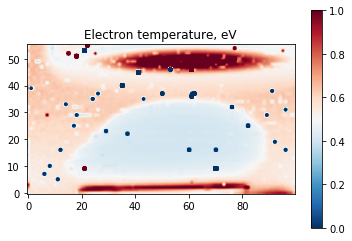

In [27]:
fig, ax = plt.subplots()

im = plt.imshow(Z1, cmap=plt.cm.RdBu_r, vmin=0, vmax=1.0, origin="lower")
im.set_interpolation('bilinear')
plt.title("Electron temperature, eV")
cb = fig.colorbar(im)

plt.savefig("img/Te"+my_fname+".svg", dpi = 300)
plt.savefig("img/Te"+my_fname+".png", dpi = 300)

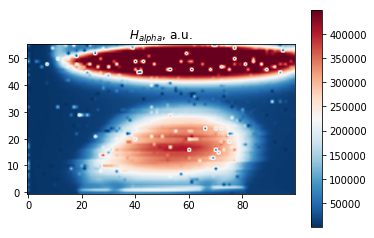

In [28]:
# z2 = copy_df['H_a'].values
# Z2 = z2.reshape(int(z2.shape/(coord[-1,1]+1)),-1)

z2 = np.pad(copy_df['H_a'].values,((0,(rastr[0]+1)*(rastr[1]+1)-(copy_df['H_a'].values).shape[0])), 'constant', constant_values = 1) 
Z2 = z2.reshape(int(z2.shape[0]/(rastr[1]+1)),-1)

fig, ax = plt.subplots()

im = plt.imshow(Z2, cmap=plt.cm.RdBu_r, origin="lower")
im.set_interpolation('bilinear')
plt.title("$H_{alpha}$, a.u.")
cb = fig.colorbar(im)
plt.savefig("img/Halpha"+my_fname+".svg", dpi = 300)
plt.savefig("img/Halpha"+my_fname+".png", dpi = 300)

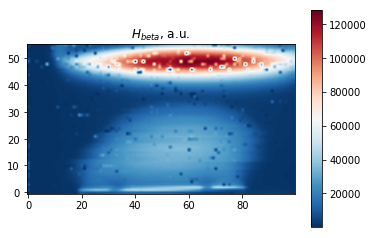

In [29]:
# z3 = copy_df['H_b'].values
# Z3 = z3.reshape(int(z3.shape/(coord[-1,1]+1)),-1)
z3 = np.pad(copy_df['H_b'].values,((0,(rastr[0]+1)*(rastr[1]+1)-(copy_df['H_b'].values).shape[0])), 'constant', constant_values = 1) 
Z3 = z3.reshape(int(z3.shape[0]/(rastr[1]+1)),-1)

fig, ax = plt.subplots()

im = plt.imshow(Z3, cmap=plt.cm.RdBu_r, origin="lower")
im.set_interpolation('bilinear')
plt.title("$H_{beta}$, a.u.")
cb = fig.colorbar(im)
plt.savefig("img/Hbeta"+my_fname+".svg", dpi = 300)
plt.savefig("img/Hbeta"+my_fname+".png", dpi = 300)

In [30]:
a = np.array([1,2,3,4])
np.pad(a, (0,0), 'constant', constant_values = 1)

array([1, 2, 3, 4])